In [2]:
#%%
%load_ext autoreload
%autoreload 2
import loader
import processor
import config
import controller
import models

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
loader.valid_ss(input='./data/final_data2.txt',output='./data/final_data2_valid.txt')

This function is used to remove invalid SMILES...
Load 6338 records, remove 0 invalid smiles...
Remain 6338 records finally...
Completed!


In [4]:
import random
import torch
import os
import numpy as np
def fix_seed(seed):
    """
    Seed all necessary random number generators.
    """
    #if seed is None:
    #    seed = random.randint(1, 10000)
    torch.set_num_threads(1)  # Suggested for issues with deadlocks, etc.
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # if you are using multi-GPU.
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.enabled = True

In [5]:
fix_seed(1)

# 数据分割方式改变

In [4]:
drug_encoding, target_encoding = 'DGL_GIN_AttrMasking', 'Prism'

In [7]:
train, val, test=loader.split_drug(input='./data/final_data2_valid.txt', random_seed=1)

This function is used to convert two columns tabular format to complete adjacency matrix...
splitting dataset...


In [8]:
train

,AAAAACACAGGUCUCUGCUAAACCGUAAGGU@(((((((((.(...((....((....(((((,AAAAAGGUACAGCUUUUUAGAAACGGAUACA@((((((......(((((((((...((.....,AAAAAGUACGUGAAAUUGUUGAAAGGGAAGG@........((.....((((((((((.....(,AAAAAGUAUUUUGAACGGACCUCUGUUUGAC@...(..(...(...(((((...(((...(((,AAAACAAAGUCCUUUCUGCCAAAGUUGGUAC@.((((...((((.[[[[[[[...((((((((,AAAACAAAGUCCUUUCUGCCAAAGUUGGUAC@.((((...((((.[[[[[[[...((((((..,AAAACAAAGUCCUUUCUGCCAAAGUUGGUAC@.((((...((((.[[[[[[[...((((.(..,AAAACAAAGUCCUUUCUGCCAAAGUUGGUAC@.((((...((((.[[[[[[[...(((.((((,AAAACAAAGUCCUUUCUGCCAAAGUUGGUAC@.((((...((((.[[[[[[[...(((..(.(,AAAACCGACAGUAGAGUCUGGAUGAGAGAAG@((([[((.(((....[[(((.......((((,...,UUUUCUUCUUAACAGCUUAUCACCCCGGAAU@..(((((((...(((((....(((((.....,UUUUCUUUUUGGCCUUUCUUAAAAAAAAAAA@((((((((((..[[[[[...........(((,UUUUGAUCCUUCGAUGUCGGCUCUUCCUAUC@...((.(.(........((((.((((((..(,UUUUGAUUCUUCGAUGUCGGCUCUUCCUAUC@..((.(.(........((((.((((((..(.,UUUUGAUUCUUCGAUGUCGGCUCUUCCUAUC@...((.(.(........((((.((((((..(,UUUUGUAGAAUGAACCGGCGAGUUACGAUUU@(........(.(.((((((..(.(((((((.,UUUUGUAUAAAAUUUUAGGAAUAGUUAAUAA@...........(..((....((...((((..,UUUUUACAUGACAAAGUUUUUAACGAGGCAG@......((((((((((........(((((((,UUUUUGAUUCUUCGAUGUCGGCUCUUCCUAU@(...((.(.(........((((.((((((..,UUUUUGCGGCUGUCUGAUCAGGCAUUGCCGC@(....(((((((((([[..(((((..(((((
C#Cc1ccc(-c2nnc(NC(=O)c3ccc(N)cc3)o2)cc1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C=C(C)CC(=O)OC1CC2(COC(C)=O)C(C=C1C)OC1C(O)C(OC(C)=O)C2(C)C12CO2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C=C1C(O)CC2C(C)(C)CC(Cl)CC2(C)C1CC(O)C1CC(=O)NC1=O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C=C1CC(OC)(C(O)C(=O)NC2OCOC3C2OC(CC(O)CO)C(C)(C)C3OC)OC(C)C1C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C=CC1(C)CC(OC(=O)CSC2CCNCC2)C2(C)C(C)CCC3(CCC(=O)C32)C(C)C1O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OCCS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[NH3+]CCC[NH2+]CCCC[NH2+]CCC[NH3+],0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[NH4+],0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
[NH][Co+3]([NH])([NH])([NH])([NH])[NH],0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


# 根据1:2的比例等比例划分数据集

In [9]:
X_drugs_train, X_targets_train, X_structures_train, y_train=loader.df2var_bal_ss(train,weight=2, random_seed=10000)

This function is used to generate dataset from tabular file...
The total number between positive and negative data is 1:2
Generate 14226 records,which contain 4742 postive records and 9484 negative records...
Completed!


In [10]:
X_drugs_val, X_targets_val,  X_structures_val, y_val=loader.df2var_bal_ss(val,weight=2, random_seed=20000)

This function is used to generate dataset from tabular file...
The total number between positive and negative data is 1:2
Generate 2016 records,which contain 672 postive records and 1344 negative records...
Completed!


In [11]:
X_drugs_test, X_targets_test, X_structures_test, y_test=loader.df2var_bal_ss(test,weight=2, random_seed=30000)

This function is used to generate dataset from tabular file...
The total number between positive and negative data is 1:2
Generate 2772 records,which contain 924 postive records and 1848 negative records...
Completed!


In [12]:
train = processor.encode_ss(X_drugs_train, X_targets_train, X_structures_train, y_train, drug_encoding, target_encoding, random_seed=1)

Drug Target Interaction Prediction...
in total: 14226 drug-target pairs
encoding drug...
unique drugs: 192
encoding protein...
unique target sequence: 3895
encoding structure...
unique structure sequence: 4261
splitting dataset...
Done.


In [13]:
train

,SMILES,Target Sequence,Target Structure,Label,drug_encoding,target_encoding,structure_encoding
0,[NH][Ir+3]([NH])([NH])([NH])([NH])[NH],CUUUUUGAUCCUUCGAUGUCGGCUCUUCCUA,((...((.(.(........((((.((((((.,0,[NH][Ir+3]([NH])([NH])([NH])([NH])[NH],"[C, U, U, U, U, U, G, A, U, C, C, U, U, C, G, ...","[(, (, ., ., ., (, (, ., (, ., (, ., ., ., ., ..."
1,CC1CC(C)C(=O)C(C(O)CC2CC(=O)NC(=O)C2)C1,GUUGGACGUGGGUUAGUCGAUCCUAAGAGAU,..((..(((((....[[(((.((...((...,0,CC1CC(C)C(=O)C(C(O)CC2CC(=O)NC(=O)C2)C1,"[G, U, U, G, G, A, C, G, U, G, G, G, U, U, A, ...","[., ., (, (, ., ., (, (, (, (, (, ., ., ., ., ..."
2,[NH][Co+3]([NH])([NH])([NH])([NH])[NH],GCAAGAUCCCGCCGGGCACCGUAAAUGUCCG,((.((.....[((((((([[.....((((((,1,[NH][Co+3]([NH])([NH])([NH])([NH])[NH],"[G, C, A, A, G, A, U, C, C, C, G, C, C, G, G, ...","[(, (, ., (, (, ., ., ., ., ., [, (, (, (, (, ..."
3,[NH][Co+3]([NH])([NH])([NH])([NH])[NH],UGGGGGCCGAAGCUAACGCGUUAAGCGCGCC,((((((((...((..[[((.....(((((((,0,[NH][Co+3]([NH])([NH])([NH])([NH])[NH],"[U, G, G, G, G, G, C, C, G, A, A, G, C, U, A, ...","[(, (, (, (, (, (, (, (, ., ., ., (, (, ., ., ..."
4,NCCCCN,UCGUGAGACAGUUCGGUCCCUAUCUGCCGUG,((....(((.((((....((..(((((((((,0,NCCCCN,"[U, C, G, U, G, A, G, A, C, A, G, U, U, C, G, ...","[(, (, ., ., ., ., (, (, (, ., (, (, (, (, ., ..."
...,...,...,...,...,...,...,...
14221,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,CCGCGGCAAGACGGAAAGACCCCGUGAACCU,((((((.(((.((......((((.((((((.,1,CCC1OC(=O)C(C)C(OC2CC(C)(OC)C(O)C(C)O2)C(C)C(O...,"[C, C, G, C, G, G, C, A, A, G, A, C, G, G, A, ...","[(, (, (, (, (, (, ., (, (, (, ., (, (, ., ., ..."
14222,CC(C)CC(N)C(=O)O,AGACAGGUGCUGCAUGGCUGUCGUCAGCUCG,.(((.((.(((...((((((.(....(((((,0,CC(C)CC(N)C(=O)O,"[A, G, A, C, A, G, G, U, G, C, U, G, C, A, U, ...","[., (, (, (, ., (, (, ., (, (, (, ., ., ., (, ..."
14223,O=S(=O)([O-])[O-],CUGAAGGAACGUUGAAGACGACGACGUUGAU,(....((..(((((.......(((((....(,0,O=S(=O)([O-])[O-],"[C, U, G, A, A, G, G, A, A, C, G, U, U, G, A, ...","[(, ., ., ., ., (, (, ., ., (, (, (, (, (, ., ..."
14224,CC(C)CC(NC(=O)C(O)C(O)C(N)CC(N)=O)C1Cc2cccc(O)...,ACUAAAAGUCGUAACAAGGUUUCCGUAGGUG,((((...(.((...(..(..(((((((((..,1,CC(C)CC(NC(=O)C(O)C(O)C(N)CC(N)=O)C1Cc2cccc(O)...,"[A, C, U, A, A, A, A, G, U, C, G, U, A, A, C, ...","[(, (, (, (, ., ., ., (, ., (, (, ., ., ., (, ..."


In [14]:
val = processor.encode_ss(X_drugs_val, X_targets_val, X_structures_val, y_val, drug_encoding, target_encoding, random_seed=1)

Drug Target Interaction Prediction...
in total: 2016 drug-target pairs
encoding drug...
unique drugs: 28
encoding protein...
unique target sequence: 1501
encoding structure...
unique structure sequence: 1642
splitting dataset...
Done.


In [15]:
test = processor.encode_ss(X_drugs_test, X_targets_test, X_structures_test, y_test, drug_encoding, target_encoding, random_seed=1)

Drug Target Interaction Prediction...
in total: 2772 drug-target pairs
encoding drug...
unique drugs: 55
encoding protein...
unique target sequence: 1872
encoding structure...
unique structure sequence: 1964
splitting dataset...
Done.


In [9]:
import torch.nn.functional as F

param = config.set(drug_encoding, 
                   target_encoding, 
                   result_folder = "./result/",
                   #input_dim_drug = 1024, 
                   #input_dim_protein = 8420,
                   hidden_dim_drug = 128, 
                   hidden_dim_protein = 128,
                   cls_hidden_dims = [1024,1024,512], 
                   #batch_size = 256, 
                   batch_size = 64, 
                   train_epoch = 100, 
                   LR = 0.001, 
                   cnn_drug_filters = [32,64,96],
                   cnn_drug_kernels = [4,6,8], #odd
                   cnn_target_filters = [32,64,96],
                   cnn_target_kernels = [4,6,8], #odd
                   num_workers=0
                  )

In [10]:
model = controller.initialize(**param)

TypeError: super(type, obj): obj must be an instance or subtype of type

In [18]:
model

In [19]:
model_test = models.Prism_GIN_AttrMasking(**param)

Pretrained model loaded


In [20]:
print(model_test)

Prism_GIN_AttrMasking(
  (gnn): GIN(
    (dropout): Dropout(p=0.5, inplace=False)
    (node_embeddings): ModuleList(
      (0): Embedding(120, 300)
      (1): Embedding(3, 300)
    )
    (gnn_layers): ModuleList(
      (0): GINLayer(
        (mlp): Sequential(
          (0): Linear(in_features=300, out_features=600, bias=True)
          (1): ReLU()
          (2): Linear(in_features=600, out_features=300, bias=True)
        )
        (edge_embeddings): ModuleList(
          (0): Embedding(6, 300)
          (1): Embedding(3, 300)
        )
        (bn): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): GINLayer(
        (mlp): Sequential(
          (0): Linear(in_features=300, out_features=600, bias=True)
          (1): ReLU()
          (2): Linear(in_features=600, out_features=300, bias=True)
        )
        (edge_embeddings): ModuleList(
          (0): Embedding(6, 300)
          (1): Embedding(3, 300)
        )
        (bn): BatchNor

In [21]:
#fixed 20210819 no shuffle

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.68982. Total time 0.00027 hours
Training at Epoch 1 iteration 100 with loss 0.62414. Total time 0.00555 hours
Training at Epoch 1 iteration 200 with loss 0.58125. Total time 0.01111 hours
Validation at Epoch 1, AUROC: 0.49194 , AUPRC: 0.32479 , F1: 0.0 , Cross-entropy Loss: 0.63940 , ***
Training at Epoch 2 iteration 0 with loss 0.62466. Total time 0.01361 hours
Training at Epoch 2 iteration 100 with loss 0.61476. Total time 0.01888 hours
Training at Epoch 2 iteration 200 with loss 0.56558. Total time 0.02416 hours
Validation at Epoch 2, AUROC: 0.47282 , AUPRC: 0.31452 , F1: 0.0 , Cross-entropy Loss: 0.64488
Training at Epoch 3 iteration 0 with loss 0.64287. Total time 0.02666 hours
Training at Epoch 3 iteration 100 with loss 0.60162. Total time 0.03222 hours
Training at Epoch 3 iteration 200 with loss 0.56958. Total time 0.0375 hours
Validation at Epoch 3, AUROC: 0.48598 , AUP

Training at Epoch 25 iteration 200 with loss 0.47684. Total time 0.3475 hours
Validation at Epoch 25, AUROC: 0.72345 , AUPRC: 0.56689 , F1: 0.39781 , Cross-entropy Loss: 0.56069 , ***
Training at Epoch 26 iteration 0 with loss 0.34708. Total time 0.35 hours
Training at Epoch 26 iteration 100 with loss 0.45604. Total time 0.35527 hours
Training at Epoch 26 iteration 200 with loss 0.39758. Total time 0.36083 hours
Validation at Epoch 26, AUROC: 0.66790 , AUPRC: 0.52490 , F1: 0.36847 , Cross-entropy Loss: 0.62260
Training at Epoch 27 iteration 0 with loss 0.32606. Total time 0.36333 hours
Training at Epoch 27 iteration 100 with loss 0.43596. Total time 0.36916 hours
Training at Epoch 27 iteration 200 with loss 0.48415. Total time 0.37444 hours
Validation at Epoch 27, AUROC: 0.74713 , AUPRC: 0.59384 , F1: 0.38159 , Cross-entropy Loss: 0.54376 , ***
Training at Epoch 28 iteration 0 with loss 0.35950. Total time 0.37694 hours
Training at Epoch 28 iteration 100 with loss 0.41004. Total time 0

Training at Epoch 50 iteration 100 with loss 0.37565. Total time 0.70444 hours
Training at Epoch 50 iteration 200 with loss 0.37157. Total time 0.71027 hours
Validation at Epoch 50, AUROC: 0.78204 , AUPRC: 0.62845 , F1: 0.52035 , Cross-entropy Loss: 0.55379 , ***
Training at Epoch 51 iteration 0 with loss 0.37515. Total time 0.71305 hours
Training at Epoch 51 iteration 100 with loss 0.32829. Total time 0.71861 hours
Training at Epoch 51 iteration 200 with loss 0.38557. Total time 0.72472 hours
Validation at Epoch 51, AUROC: 0.78045 , AUPRC: 0.64301 , F1: 0.52532 , Cross-entropy Loss: 0.54417
Training at Epoch 52 iteration 0 with loss 0.30929. Total time 0.72722 hours
Training at Epoch 52 iteration 100 with loss 0.36704. Total time 0.73305 hours
Training at Epoch 52 iteration 200 with loss 0.45575. Total time 0.73888 hours
Validation at Epoch 52, AUROC: 0.77406 , AUPRC: 0.62844 , F1: 0.48154 , Cross-entropy Loss: 0.52618
Training at Epoch 53 iteration 0 with loss 0.29496. Total time 0.7

Validation at Epoch 74, AUROC: 0.78580 , AUPRC: 0.63409 , F1: 0.51423 , Cross-entropy Loss: 0.53376
Training at Epoch 75 iteration 0 with loss 0.33376. Total time 1.06888 hours
Training at Epoch 75 iteration 100 with loss 0.33246. Total time 1.07472 hours
Training at Epoch 75 iteration 200 with loss 0.37914. Total time 1.08055 hours
Validation at Epoch 75, AUROC: 0.79071 , AUPRC: 0.64443 , F1: 0.56068 , Cross-entropy Loss: 0.55321
Training at Epoch 76 iteration 0 with loss 0.23006. Total time 1.08361 hours
Training at Epoch 76 iteration 100 with loss 0.32203. Total time 1.09055 hours
Training at Epoch 76 iteration 200 with loss 0.35124. Total time 1.09722 hours
Validation at Epoch 76, AUROC: 0.78246 , AUPRC: 0.62898 , F1: 0.54219 , Cross-entropy Loss: 0.58598
Training at Epoch 77 iteration 0 with loss 0.29589. Total time 1.10055 hours
Training at Epoch 77 iteration 100 with loss 0.27843. Total time 1.10694 hours
Training at Epoch 77 iteration 200 with loss 0.30355. Total time 1.11388 h

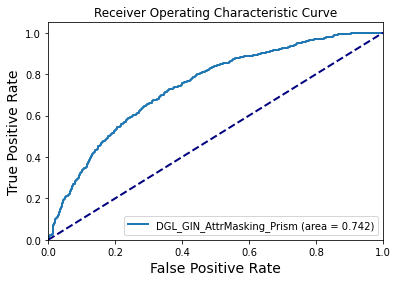

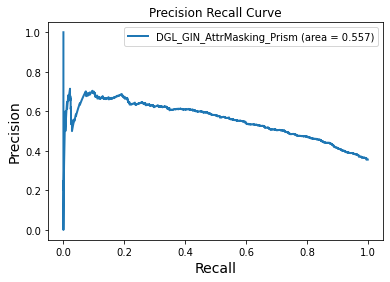

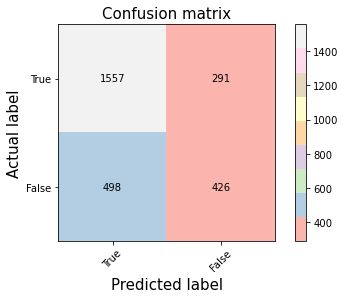

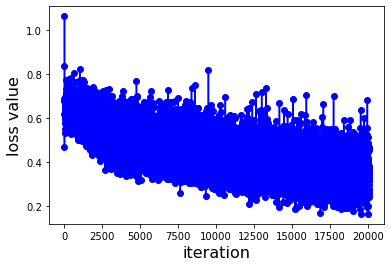

In [22]:
model.train(train, val, test)

In [ ]:
#fixed 20210819 shuffle

In [ ]:
model.train(train, val, test)

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69025. Total time 0.00027 hours
Training at Epoch 1 iteration 100 with loss 0.72988. Total time 0.00583 hours
Training at Epoch 1 iteration 200 with loss 0.62650. Total time 0.01138 hours
Validation at Epoch 1, AUROC: 0.51119 , AUPRC: 0.35933 , F1: 0.0 , Cross-entropy Loss: 0.63791 , ***
Training at Epoch 2 iteration 0 with loss 0.65337. Total time 0.01388 hours
Training at Epoch 2 iteration 100 with loss 0.75140. Total time 0.01944 hours
Training at Epoch 2 iteration 200 with loss 0.58033. Total time 0.025 hours
Validation at Epoch 2, AUROC: 0.45473 , AUPRC: 0.30126 , F1: 0.0 , Cross-entropy Loss: 0.64070
Training at Epoch 3 iteration 0 with loss 0.66511. Total time 0.0275 hours
Training at Epoch 3 iteration 100 with loss 0.65069. Total time 0.03305 hours
Training at Epoch 3 iteration 200 with loss 0.65110. Total time 0.03888 hours
Validation at Epoch 3, AUROC: 0.45778 , AUPRC

Training at Epoch 25 iteration 200 with loss 0.46262. Total time 0.34916 hours
Validation at Epoch 25, AUROC: 0.71533 , AUPRC: 0.56871 , F1: 0.46542 , Cross-entropy Loss: 0.56587
Training at Epoch 26 iteration 0 with loss 0.51751. Total time 0.35194 hours
Training at Epoch 26 iteration 100 with loss 0.48743. Total time 0.3575 hours
Training at Epoch 26 iteration 200 with loss 0.51062. Total time 0.36305 hours
Validation at Epoch 26, AUROC: 0.68586 , AUPRC: 0.55213 , F1: 0.46468 , Cross-entropy Loss: 0.59787
Training at Epoch 27 iteration 0 with loss 0.56638. Total time 0.36555 hours
Training at Epoch 27 iteration 100 with loss 0.45619. Total time 0.37111 hours
Training at Epoch 27 iteration 200 with loss 0.43537. Total time 0.37666 hours
Validation at Epoch 27, AUROC: 0.65225 , AUPRC: 0.52174 , F1: 0.45025 , Cross-entropy Loss: 0.66485
Training at Epoch 28 iteration 0 with loss 0.41152. Total time 0.37916 hours
Training at Epoch 28 iteration 100 with loss 0.51803. Total time 0.38472 ho

Training at Epoch 50 iteration 0 with loss 0.49140. Total time 0.7 hours
Training at Epoch 50 iteration 100 with loss 0.52958. Total time 0.70611 hours
Training at Epoch 50 iteration 200 with loss 0.40975. Total time 0.7125 hours
Validation at Epoch 50, AUROC: 0.73694 , AUPRC: 0.60408 , F1: 0.49773 , Cross-entropy Loss: 0.56155
Training at Epoch 51 iteration 0 with loss 0.54925. Total time 0.71527 hours
Training at Epoch 51 iteration 100 with loss 0.39438. Total time 0.72111 hours
Training at Epoch 51 iteration 200 with loss 0.46924. Total time 0.72722 hours
Validation at Epoch 51, AUROC: 0.69502 , AUPRC: 0.56931 , F1: 0.47325 , Cross-entropy Loss: 0.64589
Training at Epoch 52 iteration 0 with loss 0.45550. Total time 0.73 hours
Training at Epoch 52 iteration 100 with loss 0.44026. Total time 0.73611 hours
Training at Epoch 52 iteration 200 with loss 0.43822. Total time 0.74222 hours
Validation at Epoch 52, AUROC: 0.76344 , AUPRC: 0.61798 , F1: 0.52035 , Cross-entropy Loss: 0.54414 , *

Training at Epoch 74 iteration 200 with loss 0.41539. Total time 1.07166 hours
Validation at Epoch 74, AUROC: 0.78124 , AUPRC: 0.61845 , F1: 0.55189 , Cross-entropy Loss: 0.57837
Training at Epoch 75 iteration 0 with loss 0.49540. Total time 1.07444 hours
Training at Epoch 75 iteration 100 with loss 0.36352. Total time 1.08027 hours
Training at Epoch 75 iteration 200 with loss 0.49528. Total time 1.08583 hours
Validation at Epoch 75, AUROC: 0.77949 , AUPRC: 0.61484 , F1: 0.56837 , Cross-entropy Loss: 0.55163
Training at Epoch 76 iteration 0 with loss 0.31640. Total time 1.08861 hours
Training at Epoch 76 iteration 100 with loss 0.44069. Total time 1.09444 hours
Training at Epoch 76 iteration 200 with loss 0.39163. Total time 1.10027 hours
Validation at Epoch 76, AUROC: 0.77851 , AUPRC: 0.61615 , F1: 0.535 , Cross-entropy Loss: 0.58818
Training at Epoch 77 iteration 0 with loss 0.39610. Total time 1.10277 hours
Training at Epoch 77 iteration 100 with loss 0.34830. Total time 1.10861 hou

In [ ]:
#fixed 20210819 shuffle run2

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69025. Total time 0.00027 hours
Training at Epoch 1 iteration 100 with loss 0.72988. Total time 0.00527 hours
Training at Epoch 1 iteration 200 with loss 0.62650. Total time 0.01083 hours
Validation at Epoch 1, AUROC: 0.51119 , AUPRC: 0.35933 , F1: 0.0 , Cross-entropy Loss: 0.63791 , ***
Training at Epoch 2 iteration 0 with loss 0.65337. Total time 0.01333 hours
Training at Epoch 2 iteration 100 with loss 0.75140. Total time 0.01861 hours
Training at Epoch 2 iteration 200 with loss 0.58033. Total time 0.02388 hours
Validation at Epoch 2, AUROC: 0.45473 , AUPRC: 0.30126 , F1: 0.0 , Cross-entropy Loss: 0.64070
Training at Epoch 3 iteration 0 with loss 0.66511. Total time 0.02638 hours
Training at Epoch 3 iteration 100 with loss 0.65069. Total time 0.03194 hours
Training at Epoch 3 iteration 200 with loss 0.65110. Total time 0.03722 hours
Validation at Epoch 3, AUROC: 0.45778 , AU

Training at Epoch 25 iteration 200 with loss 0.46262. Total time 0.33694 hours
Validation at Epoch 25, AUROC: 0.71533 , AUPRC: 0.56871 , F1: 0.46542 , Cross-entropy Loss: 0.56587
Training at Epoch 26 iteration 0 with loss 0.51751. Total time 0.33944 hours
Training at Epoch 26 iteration 100 with loss 0.48743. Total time 0.345 hours
Training at Epoch 26 iteration 200 with loss 0.51062. Total time 0.35055 hours
Validation at Epoch 26, AUROC: 0.68586 , AUPRC: 0.55213 , F1: 0.46468 , Cross-entropy Loss: 0.59787
Training at Epoch 27 iteration 0 with loss 0.56638. Total time 0.35333 hours
Training at Epoch 27 iteration 100 with loss 0.45619. Total time 0.35888 hours
Training at Epoch 27 iteration 200 with loss 0.43537. Total time 0.36444 hours
Validation at Epoch 27, AUROC: 0.65225 , AUPRC: 0.52174 , F1: 0.45025 , Cross-entropy Loss: 0.66485
Training at Epoch 28 iteration 0 with loss 0.41152. Total time 0.36722 hours
Training at Epoch 28 iteration 100 with loss 0.51803. Total time 0.37305 hou

Training at Epoch 50 iteration 100 with loss 0.52958. Total time 0.69388 hours
Training at Epoch 50 iteration 200 with loss 0.40975. Total time 0.69944 hours
Validation at Epoch 50, AUROC: 0.73694 , AUPRC: 0.60408 , F1: 0.49773 , Cross-entropy Loss: 0.56155
Training at Epoch 51 iteration 0 with loss 0.54925. Total time 0.70222 hours
Training at Epoch 51 iteration 100 with loss 0.39438. Total time 0.70805 hours
Training at Epoch 51 iteration 200 with loss 0.46924. Total time 0.71361 hours
Validation at Epoch 51, AUROC: 0.69502 , AUPRC: 0.56931 , F1: 0.47325 , Cross-entropy Loss: 0.64589
Training at Epoch 52 iteration 0 with loss 0.45550. Total time 0.71638 hours
Training at Epoch 52 iteration 100 with loss 0.44026. Total time 0.72222 hours
Training at Epoch 52 iteration 200 with loss 0.43822. Total time 0.72777 hours
Validation at Epoch 52, AUROC: 0.76344 , AUPRC: 0.61798 , F1: 0.52035 , Cross-entropy Loss: 0.54414 , ***
Training at Epoch 53 iteration 0 with loss 0.37729. Total time 0.7

Validation at Epoch 74, AUROC: 0.78124 , AUPRC: 0.61845 , F1: 0.55189 , Cross-entropy Loss: 0.57837
Training at Epoch 75 iteration 0 with loss 0.49540. Total time 1.06277 hours
Training at Epoch 75 iteration 100 with loss 0.36352. Total time 1.06888 hours
Training at Epoch 75 iteration 200 with loss 0.49528. Total time 1.075 hours
Validation at Epoch 75, AUROC: 0.77949 , AUPRC: 0.61484 , F1: 0.56837 , Cross-entropy Loss: 0.55163
Training at Epoch 76 iteration 0 with loss 0.31640. Total time 1.07777 hours
Training at Epoch 76 iteration 100 with loss 0.44069. Total time 1.08388 hours
Training at Epoch 76 iteration 200 with loss 0.39163. Total time 1.09027 hours
Validation at Epoch 76, AUROC: 0.77851 , AUPRC: 0.61615 , F1: 0.535 , Cross-entropy Loss: 0.58818
Training at Epoch 77 iteration 0 with loss 0.39610. Total time 1.09361 hours
Training at Epoch 77 iteration 100 with loss 0.34830. Total time 1.10083 hours
Training at Epoch 77 iteration 200 with loss 0.27738. Total time 1.10805 hours

Training at Epoch 99 iteration 100 with loss 0.32012. Total time 1.42277 hours
Training at Epoch 99 iteration 200 with loss 0.42592. Total time 1.42888 hours
Validation at Epoch 99, AUROC: 0.77930 , AUPRC: 0.60812 , F1: 0.56988 , Cross-entropy Loss: 0.57636
Training at Epoch 100 iteration 0 with loss 0.39747. Total time 1.43166 hours
Training at Epoch 100 iteration 100 with loss 0.41533. Total time 1.43805 hours
Training at Epoch 100 iteration 200 with loss 0.35902. Total time 1.44416 hours
Validation at Epoch 100, AUROC: 0.74903 , AUPRC: 0.58789 , F1: 0.54221 , Cross-entropy Loss: 0.62633
--- Finished ---
--- Go for Testing ---
Testing at Epoch 86 , AUROC: 0.76942 , AUPRC: 0.60586 , F1: 0.57110 , Cross-entropy Loss: 0.64757
--- Training Finished ---


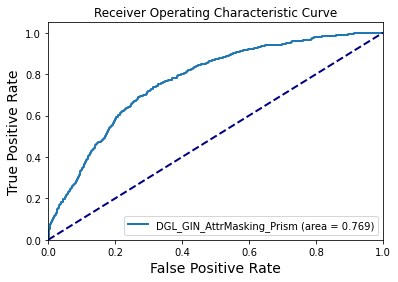

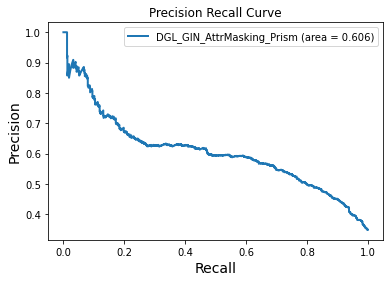

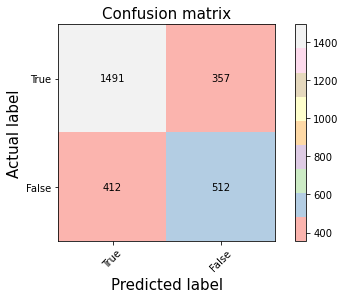

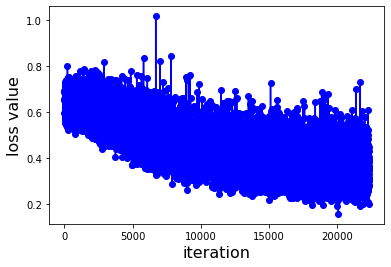

In [21]:
model.train(train, val, test)

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.69135. Total time 0.00027 hours
Training at Epoch 1 iteration 100 with loss 0.61166. Total time 0.00694 hours
Training at Epoch 1 iteration 200 with loss 0.70536. Total time 0.01333 hours
Validation at Epoch 1, AUROC: 0.50608 , AUPRC: 0.36890 , F1: 0.0 , Cross-entropy Loss: 0.63702 , ***
Training at Epoch 2 iteration 0 with loss 0.62966. Total time 0.01611 hours
Training at Epoch 2 iteration 100 with loss 0.68450. Total time 0.02222 hours
Training at Epoch 2 iteration 200 with loss 0.70386. Total time 0.02805 hours
Validation at Epoch 2, AUROC: 0.45911 , AUPRC: 0.30551 , F1: 0.0 , Cross-entropy Loss: 0.64427
Training at Epoch 3 iteration 0 with loss 0.57885. Total time 0.03111 hours
Training at Epoch 3 iteration 100 with loss 0.60694. Total time 0.0375 hours
Training at Epoch 3 iteration 200 with loss 0.67609. Total time 0.04416 hours
Validation at Epoch 3, AUROC: 0.42597 , AUP

Training at Epoch 25 iteration 200 with loss 0.48275. Total time 0.39916 hours
Validation at Epoch 25, AUROC: 0.70494 , AUPRC: 0.51947 , F1: 0.38684 , Cross-entropy Loss: 0.57972
Training at Epoch 26 iteration 0 with loss 0.57691. Total time 0.40222 hours
Training at Epoch 26 iteration 100 with loss 0.55146. Total time 0.40861 hours
Training at Epoch 26 iteration 200 with loss 0.50652. Total time 0.41444 hours
Validation at Epoch 26, AUROC: 0.67075 , AUPRC: 0.47172 , F1: 0.30703 , Cross-entropy Loss: 0.61807
Training at Epoch 27 iteration 0 with loss 0.50092. Total time 0.41722 hours
Training at Epoch 27 iteration 100 with loss 0.44147. Total time 0.42361 hours
Training at Epoch 27 iteration 200 with loss 0.45189. Total time 0.43027 hours
Validation at Epoch 27, AUROC: 0.75294 , AUPRC: 0.59587 , F1: 0.38961 , Cross-entropy Loss: 0.57582 , ***
Training at Epoch 28 iteration 0 with loss 0.49961. Total time 0.43333 hours
Training at Epoch 28 iteration 100 with loss 0.39101. Total time 0.4

Training at Epoch 50 iteration 0 with loss 0.38308. Total time 0.78916 hours
Training at Epoch 50 iteration 100 with loss 0.43262. Total time 0.79527 hours
Training at Epoch 50 iteration 200 with loss 0.33060. Total time 0.80166 hours
Validation at Epoch 50, AUROC: 0.77825 , AUPRC: 0.62260 , F1: 0.47874 , Cross-entropy Loss: 0.53452
Training at Epoch 51 iteration 0 with loss 0.44767. Total time 0.805 hours
Training at Epoch 51 iteration 100 with loss 0.51823. Total time 0.81111 hours
Training at Epoch 51 iteration 200 with loss 0.43909. Total time 0.81777 hours
Validation at Epoch 51, AUROC: 0.77034 , AUPRC: 0.62586 , F1: 0.52347 , Cross-entropy Loss: 0.57150
Training at Epoch 52 iteration 0 with loss 0.45267. Total time 0.82083 hours
Training at Epoch 52 iteration 100 with loss 0.44890. Total time 0.82722 hours
Training at Epoch 52 iteration 200 with loss 0.31405. Total time 0.83361 hours
Validation at Epoch 52, AUROC: 0.77619 , AUPRC: 0.61645 , F1: 0.53954 , Cross-entropy Loss: 0.550

Training at Epoch 74 iteration 200 with loss 0.42689. Total time 1.17444 hours
Validation at Epoch 74, AUROC: 0.77649 , AUPRC: 0.61832 , F1: 0.55269 , Cross-entropy Loss: 0.54000
Training at Epoch 75 iteration 0 with loss 0.40549. Total time 1.17694 hours
Training at Epoch 75 iteration 100 with loss 0.34130. Total time 1.18194 hours
Training at Epoch 75 iteration 200 with loss 0.53369. Total time 1.18694 hours
Validation at Epoch 75, AUROC: 0.79323 , AUPRC: 0.63174 , F1: 0.54086 , Cross-entropy Loss: 0.52976
Training at Epoch 76 iteration 0 with loss 0.36751. Total time 1.18916 hours
Training at Epoch 76 iteration 100 with loss 0.32528. Total time 1.19416 hours
Training at Epoch 76 iteration 200 with loss 0.38051. Total time 1.19916 hours
Validation at Epoch 76, AUROC: 0.75420 , AUPRC: 0.59239 , F1: 0.51662 , Cross-entropy Loss: 0.59967
Training at Epoch 77 iteration 0 with loss 0.33806. Total time 1.20138 hours
Training at Epoch 77 iteration 100 with loss 0.40571. Total time 1.20638 h

Training at Epoch 99 iteration 100 with loss 0.47781. Total time 1.485 hours
Training at Epoch 99 iteration 200 with loss 0.19669. Total time 1.49027 hours
Validation at Epoch 99, AUROC: 0.79033 , AUPRC: 0.60515 , F1: 0.61642 , Cross-entropy Loss: 0.56204
Training at Epoch 100 iteration 0 with loss 0.33737. Total time 1.4925 hours
Training at Epoch 100 iteration 100 with loss 0.31601. Total time 1.49777 hours
Training at Epoch 100 iteration 200 with loss 0.30656. Total time 1.50277 hours
Validation at Epoch 100, AUROC: 0.79755 , AUPRC: 0.61349 , F1: 0.62172 , Cross-entropy Loss: 0.55419
--- Finished ---
--- Go for Testing ---
Testing at Epoch 91 , AUROC: 0.77913 , AUPRC: 0.63044 , F1: 0.59800 , Cross-entropy Loss: 0.64934
--- Training Finished ---


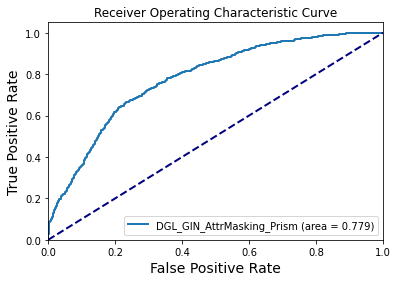

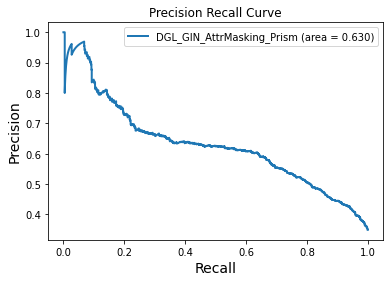

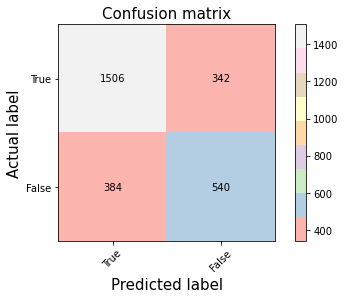

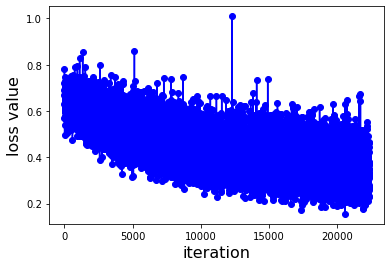

In [19]:
model.train(train, val, test)

In [ ]:
seed1=1,seed2=10000,20000,30000,7:1:2, 4742/672/924

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.68999. Total time 0.00027 hours
Training at Epoch 1 iteration 100 with loss 0.67922. Total time 0.00527 hours
Training at Epoch 1 iteration 200 with loss 0.66346. Total time 0.01027 hours
Validation at Epoch 1, AUROC: 0.54410 , AUPRC: 0.35678 , F1: 0.0 , Cross-entropy Loss: 0.63447 , ***
Training at Epoch 2 iteration 0 with loss 0.60928. Total time 0.0125 hours
Training at Epoch 2 iteration 100 with loss 0.58237. Total time 0.01722 hours
Training at Epoch 2 iteration 200 with loss 0.61980. Total time 0.0225 hours
Validation at Epoch 2, AUROC: 0.46520 , AUPRC: 0.30296 , F1: 0.0 , Cross-entropy Loss: 0.63941
Training at Epoch 3 iteration 0 with loss 0.68721. Total time 0.025 hours
Training at Epoch 3 iteration 100 with loss 0.59044. Total time 0.03027 hours
Training at Epoch 3 iteration 200 with loss 0.57909. Total time 0.03527 hours
Validation at Epoch 3, AUROC: 0.51301 , AUPRC:

Training at Epoch 25 iteration 200 with loss 0.19579. Total time 0.31805 hours
Validation at Epoch 25, AUROC: 0.77378 , AUPRC: 0.60034 , F1: 0.60210 , Cross-entropy Loss: 0.68855
Training at Epoch 26 iteration 0 with loss 0.28953. Total time 0.32055 hours
Training at Epoch 26 iteration 100 with loss 0.25676. Total time 0.32583 hours
Training at Epoch 26 iteration 200 with loss 0.24964. Total time 0.33111 hours
Validation at Epoch 26, AUROC: 0.75400 , AUPRC: 0.54897 , F1: 0.61368 , Cross-entropy Loss: 0.71709
Training at Epoch 27 iteration 0 with loss 0.32048. Total time 0.33361 hours
Training at Epoch 27 iteration 100 with loss 0.30652. Total time 0.33861 hours
Training at Epoch 27 iteration 200 with loss 0.27862. Total time 0.34388 hours
Validation at Epoch 27, AUROC: 0.75282 , AUPRC: 0.55691 , F1: 0.50441 , Cross-entropy Loss: 0.77143
Training at Epoch 28 iteration 0 with loss 0.14367. Total time 0.34638 hours
Training at Epoch 28 iteration 100 with loss 0.24258. Total time 0.35166 h

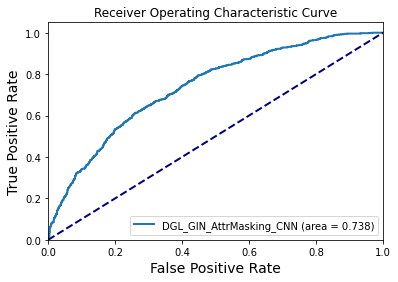

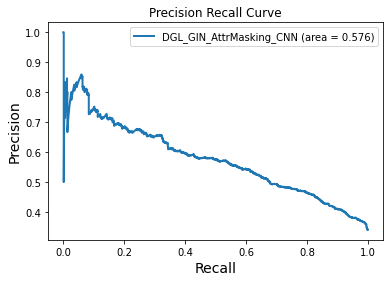

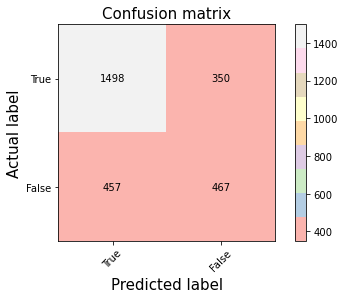

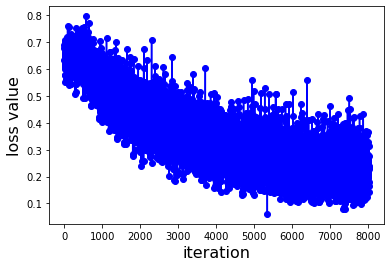

In [18]:
model.train(train, val, test)

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.68825. Total time 0.00027 hours
Training at Epoch 1 iteration 100 with loss 0.58114. Total time 0.00555 hours
Training at Epoch 1 iteration 200 with loss 0.61065. Total time 0.01111 hours
Validation at Epoch 1, AUROC: 0.48888 , AUPRC: 0.33115 , F1: 0.0 , Cross-entropy Loss: 0.63775 , ***
Training at Epoch 2 iteration 0 with loss 0.63140. Total time 0.01388 hours
Training at Epoch 2 iteration 100 with loss 0.61840. Total time 0.01916 hours
Training at Epoch 2 iteration 200 with loss 0.67121. Total time 0.02388 hours
Validation at Epoch 2, AUROC: 0.56127 , AUPRC: 0.37593 , F1: 0.01840 , Cross-entropy Loss: 0.63030 , ***
Training at Epoch 3 iteration 0 with loss 0.47903. Total time 0.02666 hours
Training at Epoch 3 iteration 100 with loss 0.54500. Total time 0.03166 hours
Training at Epoch 3 iteration 200 with loss 0.52800. Total time 0.03694 hours
Validation at Epoch 3, AUROC: 0.

Training at Epoch 25 iteration 200 with loss 0.16355. Total time 0.31944 hours
Validation at Epoch 25, AUROC: 0.74139 , AUPRC: 0.59633 , F1: 0.55555 , Cross-entropy Loss: 0.74516
Training at Epoch 26 iteration 0 with loss 0.36336. Total time 0.32222 hours
Training at Epoch 26 iteration 100 with loss 0.35410. Total time 0.32722 hours
Training at Epoch 26 iteration 200 with loss 0.38259. Total time 0.3325 hours
Validation at Epoch 26, AUROC: 0.73631 , AUPRC: 0.56379 , F1: 0.56923 , Cross-entropy Loss: 0.66133
Training at Epoch 27 iteration 0 with loss 0.24037. Total time 0.33555 hours
Training at Epoch 27 iteration 100 with loss 0.34116. Total time 0.34083 hours
Training at Epoch 27 iteration 200 with loss 0.42053. Total time 0.34611 hours
Early stop at 27
--- Finished ---
--- Go for Testing ---
Testing at Epoch 5 , AUROC: 0.69685 , AUPRC: 0.50883 , F1: 0.29948 , Cross-entropy Loss: 0.57540
--- Training Finished ---


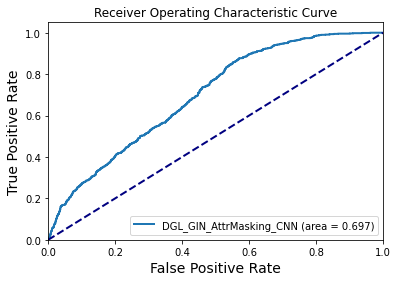

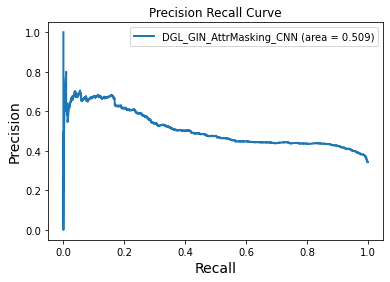

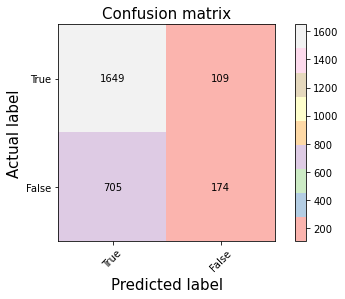

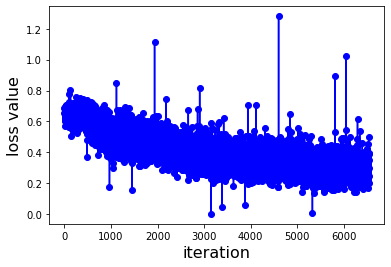

In [17]:
model.train(train, val, test)

In [ ]:
fix

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.68825. Total time 0.00027 hours
Training at Epoch 1 iteration 100 with loss 0.58114. Total time 0.00555 hours
Training at Epoch 1 iteration 200 with loss 0.61065. Total time 0.01055 hours
Validation at Epoch 1, AUROC: 0.48769 , AUPRC: 0.33061 , F1: 0.0 , Cross-entropy Loss: 0.63778 , ***
Training at Epoch 2 iteration 0 with loss 0.63140. Total time 0.01333 hours
Training at Epoch 2 iteration 100 with loss 0.61840. Total time 0.01833 hours
Training at Epoch 2 iteration 200 with loss 0.67121. Total time 0.02361 hours
Validation at Epoch 2, AUROC: 0.57659 , AUPRC: 0.40583 , F1: 0.01863 , Cross-entropy Loss: 0.62382 , ***
Training at Epoch 3 iteration 0 with loss 0.47903. Total time 0.02638 hours
Training at Epoch 3 iteration 100 with loss 0.54500. Total time 0.03138 hours
Training at Epoch 3 iteration 200 with loss 0.52800. Total time 0.03666 hours
Validation at Epoch 3, AUROC: 0.

Training at Epoch 25 iteration 200 with loss 0.17465. Total time 0.325 hours
Validation at Epoch 25, AUROC: 0.73757 , AUPRC: 0.57503 , F1: 0.53859 , Cross-entropy Loss: 0.97514
Training at Epoch 26 iteration 0 with loss 0.35698. Total time 0.3275 hours
Training at Epoch 26 iteration 100 with loss 0.45564. Total time 0.33305 hours
Training at Epoch 26 iteration 200 with loss 0.33390. Total time 0.33777 hours
Validation at Epoch 26, AUROC: 0.71455 , AUPRC: 0.54839 , F1: 0.56050 , Cross-entropy Loss: 0.77306
Training at Epoch 27 iteration 0 with loss 0.22575. Total time 0.34055 hours
Training at Epoch 27 iteration 100 with loss 0.32412. Total time 0.34583 hours
Training at Epoch 27 iteration 200 with loss 0.40369. Total time 0.35083 hours
Validation at Epoch 27, AUROC: 0.73248 , AUPRC: 0.56623 , F1: 0.57637 , Cross-entropy Loss: 0.85208
Training at Epoch 28 iteration 0 with loss 0.25326. Total time 0.35361 hours
Training at Epoch 28 iteration 100 with loss 0.24596. Total time 0.35861 hour

Training at Epoch 50 iteration 100 with loss 0.20968. Total time 0.65194 hours
Training at Epoch 50 iteration 200 with loss 0.17724. Total time 0.65722 hours
Validation at Epoch 50, AUROC: 0.71200 , AUPRC: 0.56262 , F1: 0.58437 , Cross-entropy Loss: 1.11319
Training at Epoch 51 iteration 0 with loss 0.16816. Total time 0.66 hours
Training at Epoch 51 iteration 100 with loss 0.25871. Total time 0.66527 hours
Training at Epoch 51 iteration 200 with loss 0.26360. Total time 0.67027 hours
Validation at Epoch 51, AUROC: 0.71482 , AUPRC: 0.56013 , F1: 0.54450 , Cross-entropy Loss: 1.27915
Training at Epoch 52 iteration 0 with loss 0.13814. Total time 0.67277 hours
Training at Epoch 52 iteration 100 with loss 0.17889. Total time 0.67805 hours
Training at Epoch 52 iteration 200 with loss 0.26379. Total time 0.68305 hours
Early stop at 52
--- Finished ---
--- Go for Testing ---
Testing at Epoch 30 , AUROC: 0.71678 , AUPRC: 0.57027 , F1: 0.47051 , Cross-entropy Loss: 0.91725
--- Training Finishe

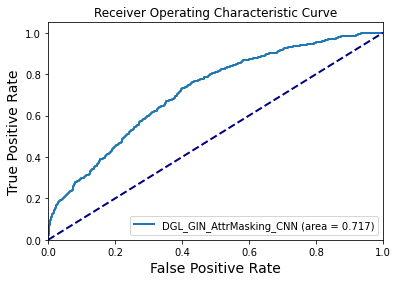

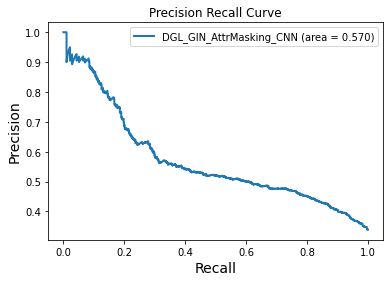

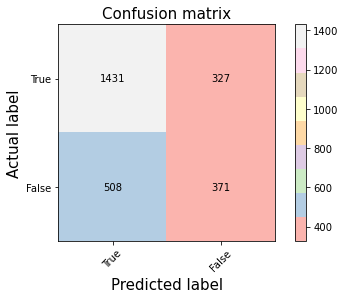

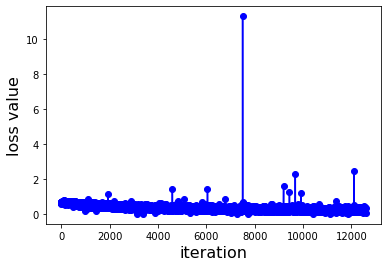

In [18]:
model.train(train, val, test)

In [ ]:
fix2

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.68830. Total time 0.00027 hours
Training at Epoch 1 iteration 100 with loss 0.58131. Total time 0.00555 hours
Training at Epoch 1 iteration 200 with loss 0.61605. Total time 0.01111 hours
Validation at Epoch 1, AUROC: 0.49697 , AUPRC: 0.33864 , F1: 0.0 , Cross-entropy Loss: 0.63811 , ***
Training at Epoch 2 iteration 0 with loss 0.62889. Total time 0.01388 hours
Training at Epoch 2 iteration 100 with loss 0.61937. Total time 0.01944 hours
Training at Epoch 2 iteration 200 with loss 0.66923. Total time 0.02472 hours
Validation at Epoch 2, AUROC: 0.50267 , AUPRC: 0.32016 , F1: 0.0 , Cross-entropy Loss: 0.64220 , ***
Training at Epoch 3 iteration 0 with loss 0.50670. Total time 0.0275 hours
Training at Epoch 3 iteration 100 with loss 0.66514. Total time 0.03305 hours
Training at Epoch 3 iteration 200 with loss 0.57159. Total time 0.03833 hours
Validation at Epoch 3, AUROC: 0.61403

Training at Epoch 25 iteration 200 with loss 0.27090. Total time 0.33527 hours
Validation at Epoch 25, AUROC: 0.71336 , AUPRC: 0.55395 , F1: 0.51582 , Cross-entropy Loss: 0.80704
Training at Epoch 26 iteration 0 with loss 0.19727. Total time 0.33833 hours
Training at Epoch 26 iteration 100 with loss 0.30160. Total time 0.34361 hours
Training at Epoch 26 iteration 200 with loss 0.39010. Total time 0.34888 hours
Validation at Epoch 26, AUROC: 0.71520 , AUPRC: 0.55283 , F1: 0.56069 , Cross-entropy Loss: 0.87194
Training at Epoch 27 iteration 0 with loss 0.30409. Total time 0.35194 hours
Training at Epoch 27 iteration 100 with loss 0.26550. Total time 0.3575 hours
Training at Epoch 27 iteration 200 with loss 0.29813. Total time 0.36277 hours
Validation at Epoch 27, AUROC: 0.68866 , AUPRC: 0.52755 , F1: 0.47863 , Cross-entropy Loss: 0.83104
Training at Epoch 28 iteration 0 with loss 0.26379. Total time 0.36555 hours
Training at Epoch 28 iteration 100 with loss 0.25258. Total time 0.37111 ho

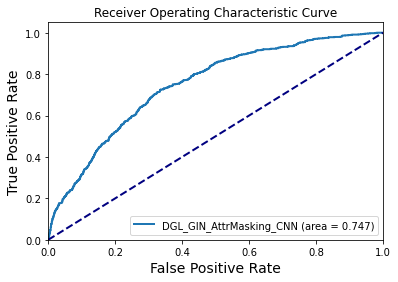

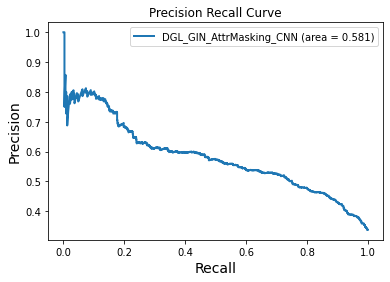

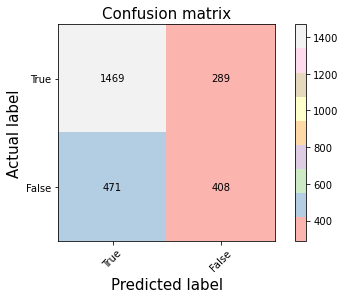

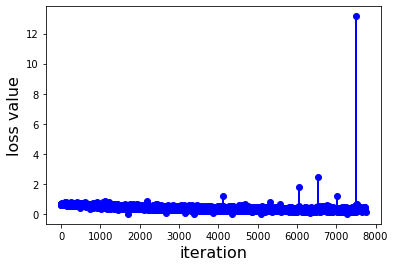

In [18]:
model.train(train, val, test)

In [2]:
model.save_model('./CNN_GIN_drug_bal_model')

NameError: name 'model' is not defined

In [3]:
model = controller.model_pretrained(path_dir = './CNN_GIN_drug_bal_model')
model

Using backend: pytorch


Pretrained model loaded


In [14]:
t_name, t= loader.predict_load('./data/target.txt', 1)

In [15]:
d_name, d= loader.predict_load('./data/drug.txt', 80)

In [16]:
y_pred = controller.classify(X_repurpose = d, 
                             target = t, 
                             model = model, 
                             drug_names = d_name, 
                             target_names = t_name, 
                             result_folder = "./result/", 
                             output_num_max=80)

virtual screening...
in total: 78 drug-target pairs
encoding drug...
unique drugs: 77
encoding protein...
unique target sequence: 1
Done.
predicting...
---------------
+------+----------------------+-------------+-------------+-------------+
| Rank |      Drug Name       | Target Name | Interaction | Probability |
+------+----------------------+-------------+-------------+-------------+
|  1   |    Valganciclovir    |  SARS-COV2  |     YES     |     0.99    |
|  2   |      Imiquimod       |  SARS-COV2  |     YES     |     0.98    |
|  3   |     Famciclovir      |  SARS-COV2  |     YES     |     0.97    |
|  4   |     Nitazoxanide     |  SARS-COV2  |     YES     |     0.91    |
|  5   |     Ganciclovir      |  SARS-COV2  |     YES     |     0.90    |
|  6   |     Penciclovir      |  SARS-COV2  |     YES     |     0.85    |
|  7   |      Entecavir       |  SARS-COV2  |     YES     |     0.84    |
|  8   |     Trifluridine     |  SARS-COV2  |     YES     |     0.83    |
|  9   |      Dida

In [17]:
model

In [21]:
#%%
%load_ext autoreload
%autoreload 2
import os
import datautils
from smoothgrad import *
from param import param_num

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [147]:
X_drugs, X_targets, y = loader.file2var(input = './data/gra_test.txt')

This function is used to generate dataset from tabular file...
Completed!


In [148]:
drug_encoding, target_encoding = 'DGL_GIN_AttrMasking', 'CNN'

In [149]:
test = processor.encode(X_drugs, X_targets, y, drug_encoding, target_encoding, random_seed = 1)

Drug Target Interaction Prediction...
in total: 1 drug-target pairs
encoding drug...
unique drugs: 1
encoding protein...
unique target sequence: 1
splitting dataset...
Done.


In [150]:
import torch.nn.functional as F

param = config.set(drug_encoding, 
                   target_encoding, 
                   result_folder = "./result/",
                   #input_dim_drug = 1024, 
                   #input_dim_protein = 8420,
                   hidden_dim_drug = 128, 
                   hidden_dim_protein = 128,
                   cls_hidden_dims = [1024,1024,512], 
                   #batch_size = 256, 
                   batch_size = 64, 
                   train_epoch = 5, 
                   LR = 0.001, 
                   cnn_drug_filters = [32,64,96],
                   cnn_drug_kernels = [4,6,8], #odd
                   cnn_target_filters = [32,64,96],
                   cnn_target_kernels = [4,6,8], #odd
                   gnn_hid_dim_drug = 64,
                   gnn_num_layers = 3,
                   gnn_activation = F.relu,
                   in_feats = 74
                  )

In [151]:
import dgl
param['batch_size']=1
def dgl_collate_func(x):
    d, p, y = zip(*x)
    d = dgl.batch(d)
    return d, torch.tensor(p), torch.tensor(y)

import torch
from torch.utils.data import SequentialSampler
from loader import *
params_test = {'batch_size': param['batch_size'],
               'shuffle': False,
               'num_workers': 0,
               'drop_last': False,
                'collate_fn': dgl_collate_func,
               'sampler': SequentialSampler(data_process_loader(test.index.values, test.Label.values, test, **param))}

test_loader = torch.utils.data.DataLoader(data_process_loader(test.index.values, test.Label.values, test, **param), **params_test)

In [152]:
import torch
device = torch.device("cuda")

In [153]:
model = models.CNN_GIN_AttrMasking(**param)

Pretrained model loaded


In [154]:
model_path = ("./CNN_GIN_drug_bal_model/model.pt")
filename = model_path.format("CNN_GIN")
print("Loading model: {}".format(filename))
model.load_state_dict(torch.load(filename, map_location='cpu'))
model = model.to(device)
#print(type(model))

Loading model: ./CNN_GIN_drug_bal_model/model.pt


In [155]:
from smoothgrad import *

batch_size=1

def compute_saliency(model, device, test_loader):

    model.eval()

    identity = "result"
    #saliency_dir = datautils.make_directory(".", "out/saliency")
    saliency_path = os.path.join("./out", identity+'.sal')

    # sgrad = SmoothGrad(model, device=device)
    sgrad = GuidedBackpropSmoothGrad(model, device=device)
    sal = ""
    #for batch_idx, (x0, y0) in enumerate(test_loader):
        #X, Y = x0.float().to(device), y0.to(device).float()
    #print(len(test))
    for batch_idx, (v_d, v_p, label) in enumerate(test_loader):
        X, Y, Z = v_d, v_p.float().to(device), label.to(device)
        #print(X.shape, Y.shape)
        #print(batch_idx)
        guided_saliency_p= sgrad.get_batch_gradients(X, Y, Z)
        # import pdb; pdb.set_trace()
        N, NS, _ = guided_saliency_p.shape # (N, 31, 1, 4)
        
        output = model(X, Y)
        prob = torch.sigmoid(output)
        p_np = prob.to(device='cpu').detach().numpy().squeeze()
        
        #print(N)
        str_sal=[] 
        for i in range(N):
            inr = batch_idx*batch_size + i
            str_sal = datautils.mat2str(np.squeeze(guided_saliency_p[i]))
            #print(p_np)
            #sal += "{}\t{:.6f}\t{}\n".format(inr, p_np, str_sal)
            str_sal
    return str_sal[:-1]
       
    #f = open(saliency_path,"w")
    #f.write(sal)
    #f.close()
    #print(saliency_path)

In [156]:
sal=compute_saliency(model, device, test_loader)

In [157]:
sal

'0.000,0.000,0.016,0.801,0.716,4.142,0.882,6.981,0.647,0.282,8.514,1.378,0.732,0.005,21.498,3.494,7.607,25.100,9.202,1.785,2.971,0.137,30.366,6.389,0.004,1.887,0.000,0.093,0.639,0.003,1.678,0.000,0.000,0.141,3.409,0.011,1.176,9.473,2.961,3.152,6.243,3.353,25.124,4.789,6.223,0.041,35.226,10.032,23.800,30.331,0.018,0.067,2.325,35.302,2.538,0.417,8.461,1.270,4.280,0.913,0.252,1.052,0.000,0.000,0.006,1.747,0.002,0.583,1.600,3.638,3.574,16.203,10.799,9.142,8.510,9.512,7.032,23.816,0.295,20.672,17.264,10.562,0.664,0.175,3.488,3.394,0.121,15.574,2.821,1.411,0.003,0.117,0.164,0.000,0.000,0.040,1.193,0.006,1.967,0.169,1.750,1.921,1.037,10.031,0.950,3.293,0.288,14.096,20.401,9.989,1.385,64.998,14.818,1.397,1.572,0.447,0.287,5.573,0.844,3.295,0.603,2.301,0.250,0.378,0.000,0.000,0.072,0.895,1.773,0.110,8.396,0.227,1.893,10.144,24.178,30.699,7.931,1.306,0.023,1.710,11.345,78.787,9.401,48.205,6.127,1.298,0.001,0.349,1.843,1.848,15.231,3.515,0.921,0.001,0.224,0.000,0.000,0.065,0.001,0.046,0.149,0.179

In [158]:
sal_list=sal.split(",")

In [159]:
test['Target Sequence'][0]

'AAAGGUUUAUACCUUCCCAGGUAACAAACCA'

In [160]:
seq_list=list(test['Target Sequence'][0])

In [161]:
seq = ','.join(seq_list)

In [162]:
print(seq)
for n in range(len(sal_list)//31):
    print(','.join(sal_list[n*31:(n+1)*31]))

A,A,A,G,G,U,U,U,A,U,A,C,C,U,U,C,C,C,A,G,G,U,A,A,C,A,A,A,C,C,A
0.000,0.000,0.016,0.801,0.716,4.142,0.882,6.981,0.647,0.282,8.514,1.378,0.732,0.005,21.498,3.494,7.607,25.100,9.202,1.785,2.971,0.137,30.366,6.389,0.004,1.887,0.000,0.093,0.639,0.003,1.678
0.000,0.000,0.141,3.409,0.011,1.176,9.473,2.961,3.152,6.243,3.353,25.124,4.789,6.223,0.041,35.226,10.032,23.800,30.331,0.018,0.067,2.325,35.302,2.538,0.417,8.461,1.270,4.280,0.913,0.252,1.052
0.000,0.000,0.006,1.747,0.002,0.583,1.600,3.638,3.574,16.203,10.799,9.142,8.510,9.512,7.032,23.816,0.295,20.672,17.264,10.562,0.664,0.175,3.488,3.394,0.121,15.574,2.821,1.411,0.003,0.117,0.164
0.000,0.000,0.040,1.193,0.006,1.967,0.169,1.750,1.921,1.037,10.031,0.950,3.293,0.288,14.096,20.401,9.989,1.385,64.998,14.818,1.397,1.572,0.447,0.287,5.573,0.844,3.295,0.603,2.301,0.250,0.378
0.000,0.000,0.072,0.895,1.773,0.110,8.396,0.227,1.893,10.144,24.178,30.699,7.931,1.306,0.023,1.710,11.345,78.787,9.401,48.205,6.127,1.298,0.001,0.349,1.843,1.848,15.231,3.51

In [163]:
with open('./data/df.txt', 'w+') as f:
    #f.write(str(seq) + '\n')
    for n in range(len(sal_list)//31):
        f.write(','.join(sal_list[n*31:(n+1)*31]) + '\n')

In [164]:
df=pd.read_table('./data/df.txt',sep=',',header=None)

In [165]:
df

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,0.0,0.016,0.801,0.716,4.142,0.882,6.981,0.647,0.282,...,0.137,30.366,6.389,0.004,1.887,0.000,0.093,0.639,0.003,1.678
1,0.0,0.0,0.141,3.409,0.011,1.176,9.473,2.961,3.152,6.243,...,2.325,35.302,2.538,0.417,8.461,1.270,4.280,0.913,0.252,1.052
2,0.0,0.0,0.006,1.747,0.002,0.583,1.600,3.638,3.574,16.203,...,0.175,3.488,3.394,0.121,15.574,2.821,1.411,0.003,0.117,0.164
3,0.0,0.0,0.040,1.193,0.006,1.967,0.169,1.750,1.921,1.037,...,1.572,0.447,0.287,5.573,0.844,3.295,0.603,2.301,0.250,0.378
4,0.0,0.0,0.072,0.895,1.773,0.110,8.396,0.227,1.893,10.144,...,1.298,0.001,0.349,1.843,1.848,15.231,3.515,0.921,0.001,0.224
5,0.0,0.0,0.065,0.001,0.046,0.149,0.179,1.802,12.754,0.092,...,4.344,1.099,3.038,7.835,0.265,5.273,0.011,0.033,0.000,0.015


In [166]:
df2=pd.read_table('./data/df2.txt',sep=',',header=None)

In [167]:
import pandas as pd
df3 = pd.Series(list('AAAGGUUUAUACCUUCCCAGGUAACAAACCA'))
df4=(pd.get_dummies(df3)).T

In [168]:
df5=df4.rename(index={'A': '0','U': '1','C': '2','G': '3'})

In [169]:
df6=df5.sort_index()

In [170]:
merge = df6.append(df2, ignore_index=True)

In [171]:
df_final=df*merge

In [172]:
df_final

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,0.0,0.016,0.000,0.000,0.000,0.000,0.000,0.647,0.000,...,0.000,30.366,6.389,0.000,1.887,0.0,0.093,0.000,0.000,1.678
1,0.0,0.0,0.000,0.000,0.000,1.176,9.473,2.961,0.000,6.243,...,2.325,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000
2,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.121,0.000,0.0,0.000,0.003,0.117,0.000
3,0.0,0.0,0.000,1.193,0.006,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000
4,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000
5,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000


In [173]:
df_final.max().max()

30.366

In [174]:
df_norm=df_final/df_final.max().max()

In [175]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

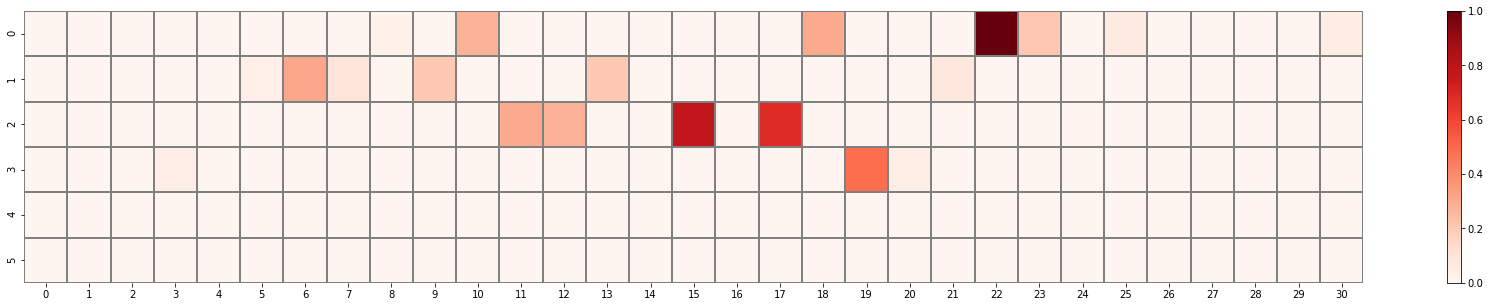

In [176]:
plt.figure(figsize=(30, 5))

h=sns.heatmap(df_norm, cmap='Reds', linewidths=0.1, linecolor='grey',annot=False,cbar=False)
cb = h.figure.colorbar(h.collections[0]) #显示colorbar
cb.ax.tick_params(labelsize=10)  # 设置colorbar刻度字体大小。
#,cbar_kws={"shrink": 0.5}
#plt.savefig("chr.pdf")
plt.show()


In [71]:
df_all=pd.read_table('./data/df.txt',sep=',',header=None)

In [72]:
df_all.max().max()

3.735

In [73]:
df_all_norm=df_all/df_all.max().max()

In [74]:
df_all_norm

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,0.0,0.000000,0.000535,0.002142,0.004552,0.003481,0.077376,0.055689,0.055154,...,0.442303,0.231058,0.004819,0.001071,0.486479,0.125569,0.002142,0.044980,0.000000,0.003481
1,0.0,0.0,0.000535,0.010442,0.000803,0.000000,0.083534,0.039893,0.219545,0.008032,...,0.417938,0.446319,0.008568,0.063989,0.018206,0.088621,0.022222,0.093976,0.003213,0.002142
2,0.0,0.0,0.000000,0.004016,0.000268,0.013922,0.000268,0.118876,0.000268,0.042838,...,0.037751,0.054083,0.004016,0.219813,0.359304,0.001606,0.043909,0.002142,0.000000,0.000535
3,0.0,0.0,0.000000,0.002142,0.000535,0.004819,0.002677,0.001071,0.019813,0.002410,...,0.062383,0.028648,0.149933,0.173762,0.002410,0.025167,0.025971,0.102276,0.000000,0.001339
4,0.0,0.0,0.000268,0.002677,0.006961,0.015797,0.003748,0.022222,0.004284,0.035341,...,0.010977,0.005890,0.242838,0.000000,0.484337,0.148862,0.058099,0.006426,0.001339,0.000000
5,0.0,0.0,0.000268,0.000000,0.000268,0.006426,0.006158,0.000268,0.004819,0.052744,...,0.135743,0.006426,0.000803,0.245783,0.006158,0.189290,0.004819,0.014458,0.000803,0.000000


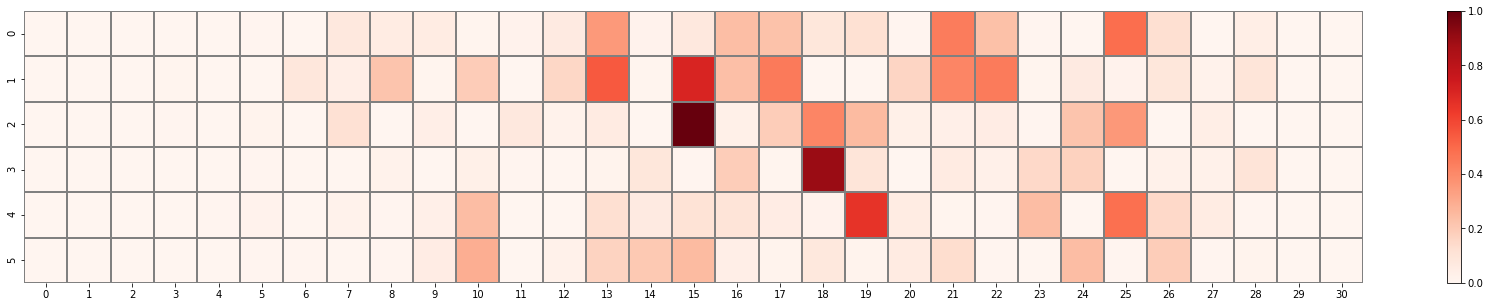

In [75]:
plt.figure(figsize=(30, 5))

h=sns.heatmap(df_all_norm, cmap='Reds', linewidths=0.1, linecolor='grey',annot=False,cbar=False)
cb = h.figure.colorbar(h.collections[0]) #显示colorbar
cb.ax.tick_params(labelsize=10)  # 设置colorbar刻度字体大小。
#,cbar_kws={"shrink": 0.5}
#plt.savefig("chr.pdf")
plt.show()


In [81]:
t_name, t= loader.predict_load('./data/target2.txt', 1)

In [82]:
d_name, d= loader.predict_load('./data/drug.txt', 80)

In [83]:
model = controller.model_pretrained(path_dir = './CNN_GIN_drug_bal_model')
model

Pretrained model loaded


In [84]:
y_pred = controller.classify(X_repurpose = d, 
                             target = t, 
                             model = model, 
                             drug_names = d_name, 
                             target_names = t_name, 
                             result_folder = "./result/", 
                             output_num_max=80)

virtual screening...
in total: 78 drug-target pairs
encoding drug...
unique drugs: 77
encoding protein...
unique target sequence: 1
Done.
predicting...
---------------
+------+----------------------+-----------------+-------------+-------------+
| Rank |      Drug Name       |   Target Name   | Interaction | Probability |
+------+----------------------+-----------------+-------------+-------------+
|  1   |       Loviride       | Single-stranded |      NO     |     0.26    |
|  2   |     Chloroquine      | Single-stranded |      NO     |     0.17    |
|  3   |      Letermovir      | Single-stranded |      NO     |     0.17    |
|  4   |  Hydroxychloroquine  | Single-stranded |      NO     |     0.14    |
|  5   |      Indinavir       | Single-stranded |      NO     |     0.06    |
|  6   |      Amprenavir      | Single-stranded |      NO     |     0.02    |
|  7   |      Vicriviroc      | Single-stranded |      NO     |     0.01    |
|  8   |       Arbidol        | Single-stranded |   

In [ ]:
#drug visualization

In [6]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

In [16]:
smiles='CC(=O)OC1=CC=CC=C1C(=O)NC2=NC=C(S2)[N+](=O)[O-]'

In [17]:
m = Chem.MolFromSmiles(smiles)

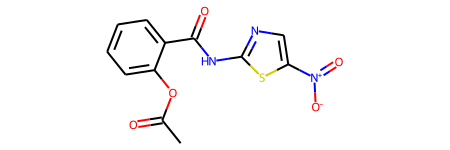

In [18]:
m

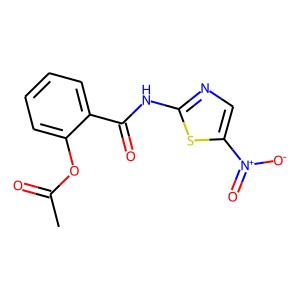

In [19]:
def moltosvg(mol, molSize = (300,300), kekulize = True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg.replace('svg:','')

SVG(moltosvg(m))

In [ ]:
#disney test

In [7]:
model = controller.model_pretrained(path_dir = './CNN_GIN_drug_bal_model')
model

Using backend: pytorch


Pretrained model loaded


In [14]:
t_name, t= loader.predict_load('./data/mir21_target.txt', 3)

In [15]:
d_name, d= loader.predict_load('./data/mir21_drug.txt', 3)

In [16]:
y_pred = controller.classify(X_repurpose = d, 
                             target = t, 
                             model = model, 
                             drug_names = d_name, 
                             target_names = t_name, 
                             result_folder = "./result/", 
                             output_num_max=10)

virtual screening...
in total: 9 drug-target pairs
encoding drug...
unique drugs: 3
encoding protein...
unique target sequence: 3
Done.
predicting...
---------------
+------+-----------+-------------+-------------+-------------+
| Rank | Drug Name | Target Name | Interaction | Probability |
+------+-----------+-------------+-------------+-------------+
|  1   |     1     |  miR21_hx2  |     YES     |     0.80    |
|  2   |     1a    |  miR21_hx2  |     YES     |     0.80    |
|  3   |     2     |  miR21_hx2  |     YES     |     0.73    |
|  4   |     1     |   miR21_st  |      NO     |     0.24    |
|  5   |     1a    |   miR21_st  |      NO     |     0.21    |
|  6   |     2     |   miR21_st  |      NO     |     0.17    |
|  7   |     2     |  miR21_hx1  |      NO     |     0.00    |
|  8   |     1     |  miR21_hx1  |      NO     |     0.00    |
|  9   |     1a    |  miR21_hx1  |      NO     |     0.00    |
+------+-----------+-------------+-------------+-------------+

In [75]:
C1='COc1ccc(Br)cc1C(=O)Nc4ccc(c3nc2ccccc2[nH]3)cc4'

In [ ]:
C2

In [ ]:
C3

In [ ]:
C4

In [ ]:
C5

In [83]:
C5='CNc2nc(Nc1cccc(C(=O)O)c1)nc3ccccc23'

In [47]:
sm1='COC(=O)CCCOc5ccc(c4nc3ccc(c2ccc(N1CCN(C)CC1)cc2)cc3[nH]4)cc5'

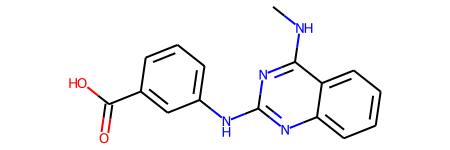

In [48]:
from rdkit import Chem
Chem.MolFromSmiles(C5)

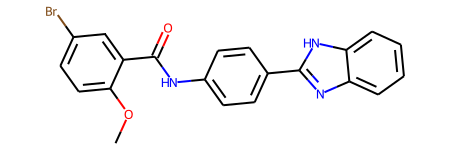

In [76]:
Chem.MolFromSmiles(C1)

In [20]:
#%%
%load_ext autoreload
%autoreload 2
import os
import datautils
from smoothgrad import *
from param import param_num

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
X_drugs, X_targets, y = loader.file2var(input = './data/gra_test.txt')

This function is used to generate dataset from tabular file...
Completed!


In [22]:
drug_encoding, target_encoding = 'DGL_GIN_AttrMasking', 'CNN'

In [23]:
test = processor.encode(X_drugs, X_targets, y, drug_encoding, target_encoding, random_seed = 1)

Drug Target Interaction Prediction...
in total: 1 drug-target pairs
encoding drug...
unique drugs: 1
encoding protein...
unique target sequence: 1
splitting dataset...
Done.


In [24]:
import torch.nn.functional as F

param = config.set(drug_encoding, 
                   target_encoding, 
                   result_folder = "./result/",
                   #input_dim_drug = 1024, 
                   #input_dim_protein = 8420,
                   hidden_dim_drug = 128, 
                   hidden_dim_protein = 128,
                   cls_hidden_dims = [1024,1024,512], 
                   #batch_size = 256, 
                   batch_size = 64, 
                   train_epoch = 5, 
                   LR = 0.001, 
                   cnn_drug_filters = [32,64,96],
                   cnn_drug_kernels = [4,6,8], #odd
                   cnn_target_filters = [32,64,96],
                   cnn_target_kernels = [4,6,8], #odd
                   gnn_hid_dim_drug = 64,
                   gnn_num_layers = 3,
                   gnn_activation = F.relu,
                   in_feats = 74
                  )

In [25]:
import dgl
param['batch_size']=1
def dgl_collate_func(x):
    d, p, y = zip(*x)
    d = dgl.batch(d)
    return d, torch.tensor(p), torch.tensor(y)

import torch
from torch.utils.data import SequentialSampler
from loader import *
params_test = {'batch_size': param['batch_size'],
               'shuffle': False,
               'num_workers': 0,
               'drop_last': False,
                'collate_fn': dgl_collate_func,
               'sampler': SequentialSampler(data_process_loader(test.index.values, test.Label.values, test, **param))}

test_loader = torch.utils.data.DataLoader(data_process_loader(test.index.values, test.Label.values, test, **param), **params_test)

In [26]:
import torch
device = torch.device("cuda")

In [27]:
model = models.CNN_GIN_AttrMasking(**param)

Pretrained model loaded


In [28]:
model_path = ("./CNN_GIN_drug_bal_model/model.pt")
filename = model_path.format("CNN_GIN")
print("Loading model: {}".format(filename))
model.load_state_dict(torch.load(filename, map_location='cuda'))
model = model.to(device)
#print(type(model))

Loading model: ./CNN_GIN_drug_bal_model/model.pt


In [29]:
from smoothgrad import *

batch_size=1

def compute_saliency(model, device, test_loader):

    model.eval()

    identity = "result"
    #saliency_dir = datautils.make_directory(".", "out/saliency")
    saliency_path = os.path.join("./out", identity+'.sal')

    # sgrad = SmoothGrad(model, device=device)
    sgrad = GuidedBackpropSmoothGrad(model, device=device)
    sal = ""
    #for batch_idx, (x0, y0) in enumerate(test_loader):
        #X, Y = x0.float().to(device), y0.to(device).float()
    #print(len(test))
    for batch_idx, (v_d, v_p, label) in enumerate(test_loader):
        X, Y, Z = v_d, v_p.float().to(device), label.to(device)
        #print(X.shape, Y.shape)
        #print(batch_idx)
        guided_saliency_p= sgrad.get_batch_gradients(X, Y, Z)
        # import pdb; pdb.set_trace()
        N, NS, _ = guided_saliency_p.shape # (N, 31, 1, 4)
        
        output = model(X, Y)
        prob = torch.sigmoid(output)
        p_np = prob.to(device='cpu').detach().numpy().squeeze()
        
        #print(N)
        str_sal=[] 
        for i in range(N):
            inr = batch_idx*batch_size + i
            str_sal = datautils.mat2str(np.squeeze(guided_saliency_p[i]))
            #print(p_np)
            #sal += "{}\t{:.6f}\t{}\n".format(inr, p_np, str_sal)
            str_sal
    return str_sal[:-1]
       
    #f = open(saliency_path,"w")
    #f.write(sal)
    #f.close()
    #print(saliency_path)

In [30]:
sal=compute_saliency(model, device, test_loader)

In [31]:
sal_list=sal.split(",")

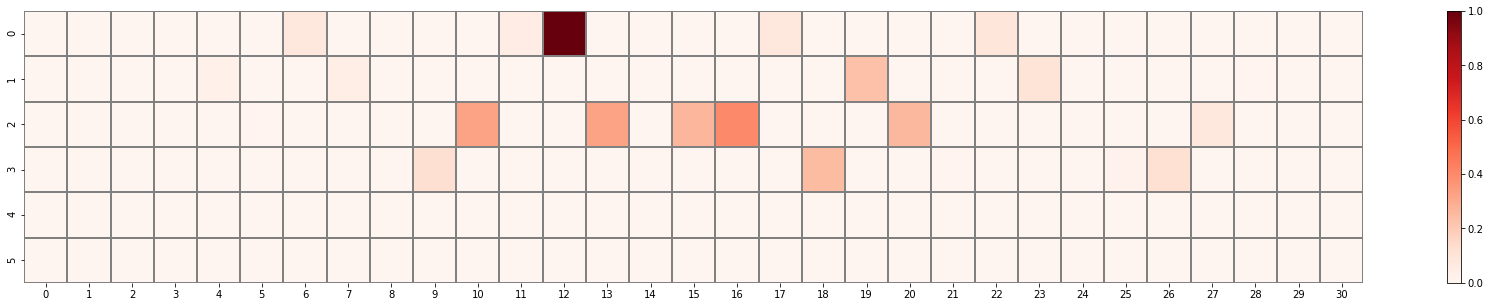

In [32]:
test['Target Sequence'][0]
seq_list=list(test['Target Sequence'][0])
seq = ','.join(seq_list)
with open('./data/df.txt', 'w+') as f:
    #f.write(str(seq) + '\n')
    for n in range(len(sal_list)//31):
        f.write(','.join(sal_list[n*31:(n+1)*31]) + '\n')
df=pd.read_table('./data/df.txt',sep=',',header=None)
df2=pd.read_table('./data/df2.txt',sep=',',header=None)
import pandas as pd
df3 = pd.Series(list('AAUCUCAUGGCAACACCAGUCGAUGGGCUGU'))
df4=(pd.get_dummies(df3)).T
df5=df4.rename(index={'A': '0','U': '1','C': '2','G': '3'})
df6=df5.sort_index()
merge = df6.append(df2, ignore_index=True)
df_final=df*merge
df_final
df_final.max().max()
df_norm=df_final/df_final.max().max()
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
plt.figure(figsize=(30, 5))
h=sns.heatmap(df_norm, cmap='Reds', linewidths=0.1, linecolor='grey',annot=False,cbar=False)
cb = h.figure.colorbar(h.collections[0]) #显示colorbar
cb.ax.tick_params(labelsize=10)  # 设置colorbar刻度字体大小。
#,cbar_kws={"shrink": 0.5}
#plt.savefig("chr.pdf")
plt.show()
